# Muestreo de importancia

Encontrar la integral de:

\begin{align}
\int_{0.5}^{0.7}  sin^2(x)dx
\end{align}

Para realizar el muestreo de importancia primero se realiza un cambio de variable. Con una función de tipo:

$$
h(x)=
\begin{cases}
0,  &  x < 0.5\\
1,  & 0.5\leq x \leq 1.7  \\
0   &  x > 1.7\\
\end{cases}
$$

Queda redefinida como:

\begin{align}
\int_{-\infty}^{\infty} h(x) sin^2(x)dx
\end{align}

Y, para encontrar el estimativo de la integral se eligió una función gaussiana $g(x)$, tal que queda:

\begin{align}
E[h(Y)] =& \int_{-\infty}^{\infty} \left (  \frac{h(x) sin^2(x)}{g_y(x)} \right) g(x) dx \\
\end{align}

\begin{align}
\hat E[h(Y)] =& \hat E \left [ \frac{h(X) sin^2(X)}{g(X)} \right] \\
             =& \frac{1}{N}\sum_{i=1}^{N} \frac{h(x_i) sin^2(x_i)}{g(x_i)} 
\end{align}


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from IPython.display import Latex

In [10]:
def montecarlo(h, f, xo, xf, mu, sigma, N, graph):
    '''xo: límite inferior integral, xf: límite superior integral, 
    mu: media, sigma: desviación estándar, N: numero de puntos,
    graph: decidir si hacer o no gráfica'''
    
    #Gaussiana
    g = lambda x : stats.norm(mu,sigma).pdf(x)
    
    #Numeros aleatorios 
    X = np.array([np.random.normal(mu,sigma) for i in range(N)])
    
    #Estimativo
    E = 1./N * np.sum(h(X, xo, xf)*f(X)/g(X))
    
    #Varianza
    std = 1./N * np.sum((h(X, xo, xf)*f(X)/g(X))**2) - E**2
    
    if graph:
        #Realizar la gráfica en los momentos requeridos, para más ilústración
        plt.rcParams["figure.figsize"] = (10,5)
        x = np.linspace(xo-1, xf+1, 100)
    
        plt.plot(x, h(x, xo, xf), label='h(x)')
        plt.plot(x, f(x), label='$f(x)$')
        plt.plot(x, g(x), label='g(x)')
        plt.legend()
        
    
    return E, std

In [9]:
#Funciones:

def h(x, xo, xf): 
    aux = []
    for i in range(len(x)):
        if x[i] > xo and x[i] < xf:
            aux.append(1)
        else: 
            aux.append(0)
    return aux
  
    
f1 = lambda x : np.sin(x)**2
f2 = lambda x : (x**2 - 4) / 96     #Normalizada, para visualización

<IPython.core.display.Latex object>

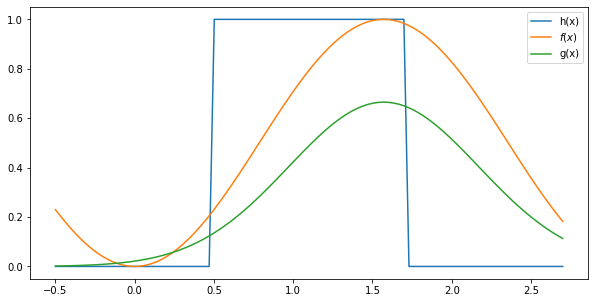

In [13]:
E_1, std_1 = montecarlo(h, f1, 0.5, 1.7, np.pi/2 , 0.6, 10**4, True)

Latex(f' La integral entre 0.5 y 0.7 de $\int sin^2(x)dx = $ {E_1:.4f} $\pm$ {std_1:.4F}')

Por otro lado, para encontrar la integral de:

\begin{align}
\int_{0}^{10} (x^2 - 4)dx
\end{align}

Se debe partir la integral en 2 intervalos, dado que la función es negativa en el intervalo $[0, 2]$:

\begin{align}
\int_{0}^{2} (x^2 - 4)dx +  \int_{2}^{10}(x^2 - 4)dx
\end{align}

\begin{align}
\int_{-\infty}^{\infty} h_1(x) (x^2 - 4)dx +  \int_{-\infty}^{\infty} h_2(x) (x^2 - 4)dx
\end{align}

Donde:

\begin{align}
h_1(x)=&
    \begin{cases}
    0,  &  x < 0\\
    1,  & 0\leq x \leq 2  \\
    0   &  x > 2\\
    \end{cases}  &
h_2(x)=&
    \begin{cases}
    0,  &  x < 2\\
    1,  & 2\leq x \leq 10  \\
    0   &  x > 10\\
\end{cases}
\end{align}

Y, para encontrar el estimativo de la integral se eligió una función gaussiana $g_x(x)$, tal que queda:

\begin{align}
\hat E[h(Y)] =& \hat E \left [ \frac{h_1(X) (X^2 - 4)}{g_1(X)} \right]  +  \hat E \left [ \frac{h_2(X) (X^2 - 4)}{g_2(X)} \right] \\
             =& \frac{1}{N} \left ( \sum_{i=1}^{N}\frac{h_1(x_i) (x_i^2 - 4)}{g_1(x_i)} +  \frac{h_2(x_i) (x_i^2 - 4)}{g_2(x_i)} \right )
\end{align}

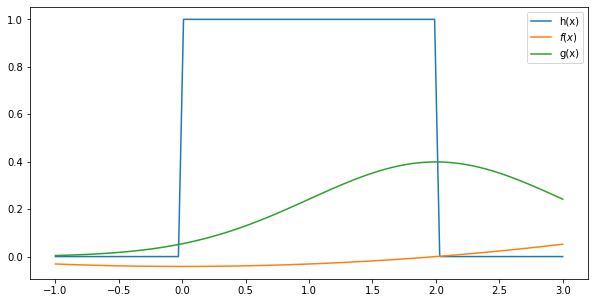

In [23]:
#intervalo de 0 a 2
E_2, std_2 = montecarlo(h, f2, 0, 2, 2 , 1, 10**6, True)

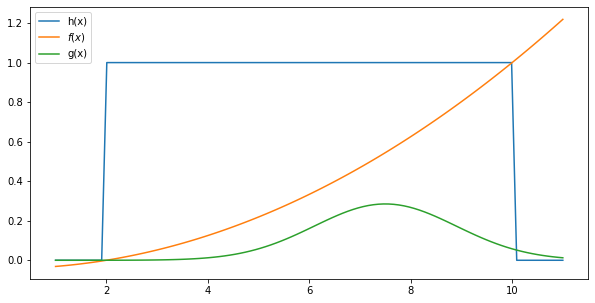

In [24]:
#Intervalo de 2 a 10
E_3, std_3  = montecarlo(h, f2, 2, 10, 7.5, 1.4, 10**6, True )

In [25]:
Latex(f' La integral entre 0 y 10 es $\int (x^2 -4))dx =$  {((E_2 + E_3)*96):.4f} $\pm$ {(std_2 + std_3):.4f} ')

<IPython.core.display.Latex object>

Para ver como mejora la técnica de Montecarlo con importance samplig, se ve que a medida que se aumentan el número de muestras N, la integral se aceca más a su valor analítico, teniendo en cuanta que los valores de las integrales son:

\begin{align}
\int_{0.5}^{0.7}  sin^2(x)dx = 0.874253
\end{align}

\begin{align}
\int_{0}^{10} (x^2 - 4)dx = 293.33
\end{align}

In [26]:
for i in range(2, 8):
    N = 10**i
    inte, std = montecarlo(h, f1, 0.5, 1.7, np.pi/2 , 0.6, N, False)
    print(f'integral : {inte:.4f}, Número de muestras: {N}')

integral : 0.9240, Número de muestras: 100
integral : 0.8759, Número de muestras: 1000
integral : 0.8886, Número de muestras: 10000
integral : 0.8765, Número de muestras: 100000
integral : 0.8739, Número de muestras: 1000000
integral : 0.8742, Número de muestras: 10000000


In [27]:
for i in range(2, 7):
    N = 10**i
    inte_1, std_1 = montecarlo(h, f2, 0, 2, 2 , 1, N, False)
    inte_2, std_2 = montecarlo(h, f2, 2, 10, 9 , 1, N, False)
    print(f'integral : {(inte_1 + inte_2)*96:.4f}, Número de muestras: {N}')

integral : 223.5611, Número de muestras: 100
integral : 256.4196, Número de muestras: 1000
integral : 282.3555, Número de muestras: 10000
integral : 278.4842, Número de muestras: 100000
integral : 292.4442, Número de muestras: 1000000
